In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("songs.csv", encoding="ISO-8859-1")

df.info() # Displays columns and types
df.head() # Displays first few columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.describe() # Generates descriptive statistics
df.isnull() # Checks for missing values

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


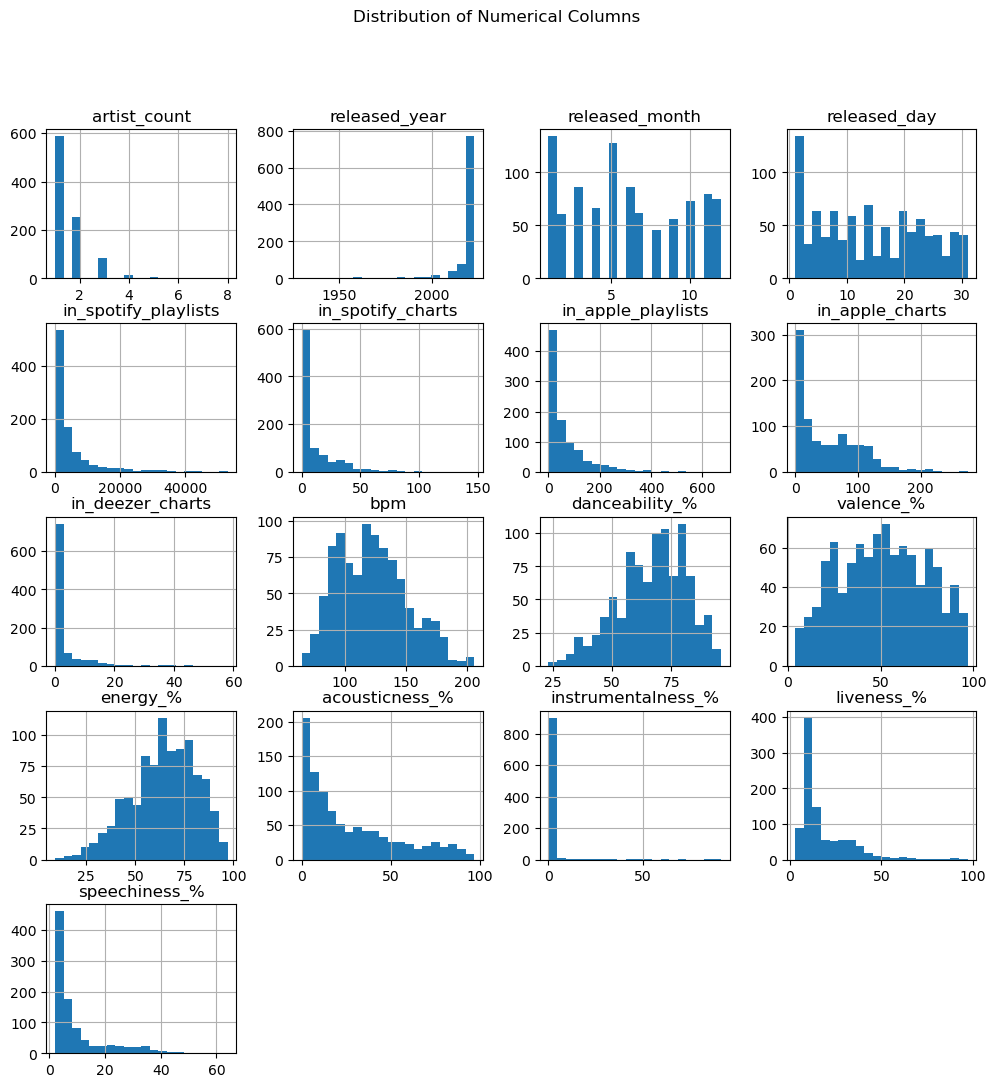

In [4]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns # Extracts the columns by int and float data type
df[numerical_cols].hist(figsize = (12,12), bins = 20)
plt.suptitle("Distribution of Numerical Columns")
plt.show()

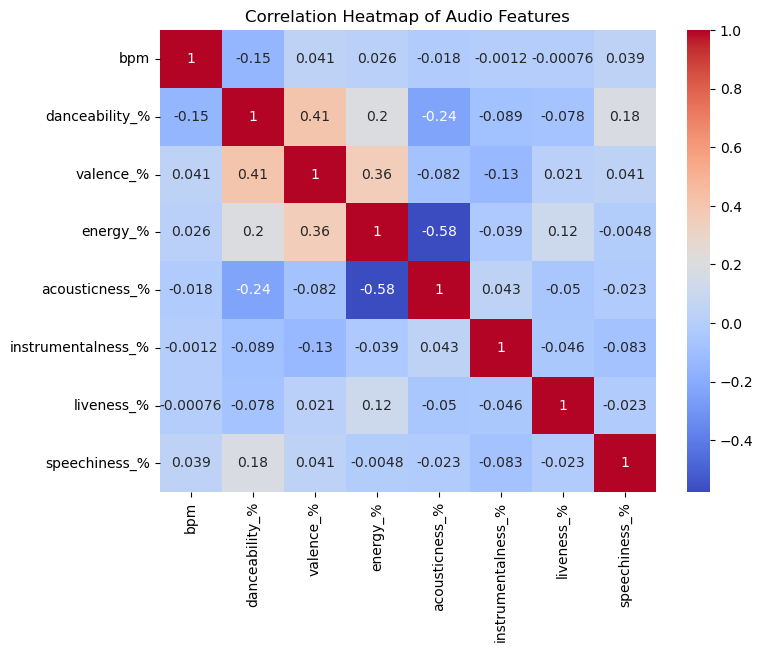

In [5]:
numeric_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

corr = df[numeric_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Audio Features")
plt.show()

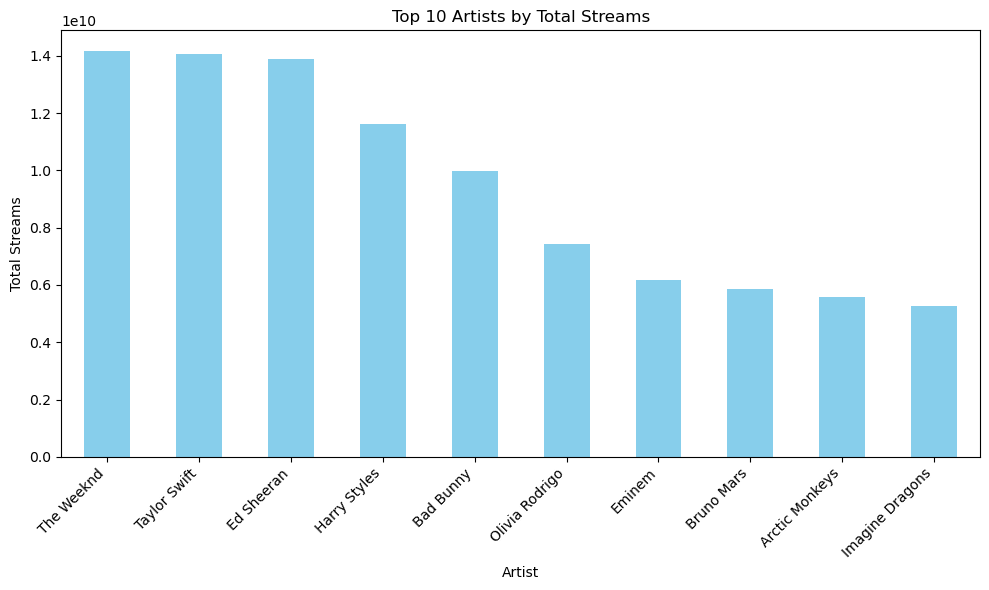

In [22]:
# Explored the correlation between Top 10 Artists and Total Streams

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Group by artist and sum streams
top_artists = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plot top 10 artists
plt.figure(figsize=(10,6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Total Streams')
plt.ylabel('Total Streams')
plt.xlabel('Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


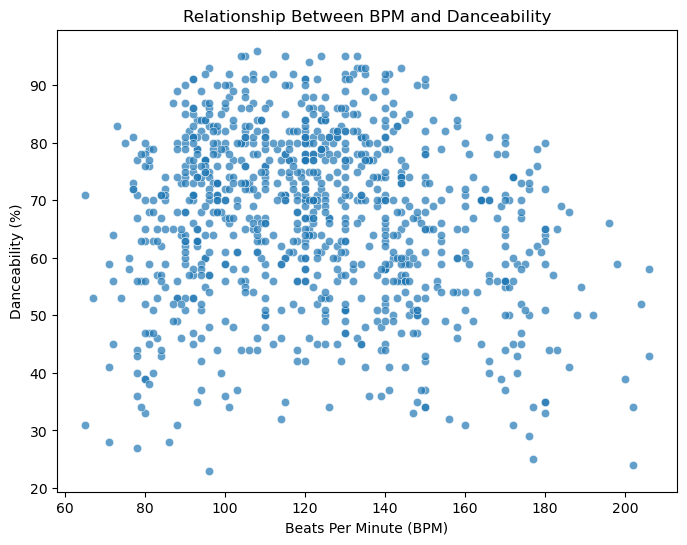

In [26]:
# Explored the correlation between BPM and Danceability

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='bpm', y='danceability_%', alpha=0.7)
plt.title('Relationship Between BPM and Danceability')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Danceability (%)')
plt.show()


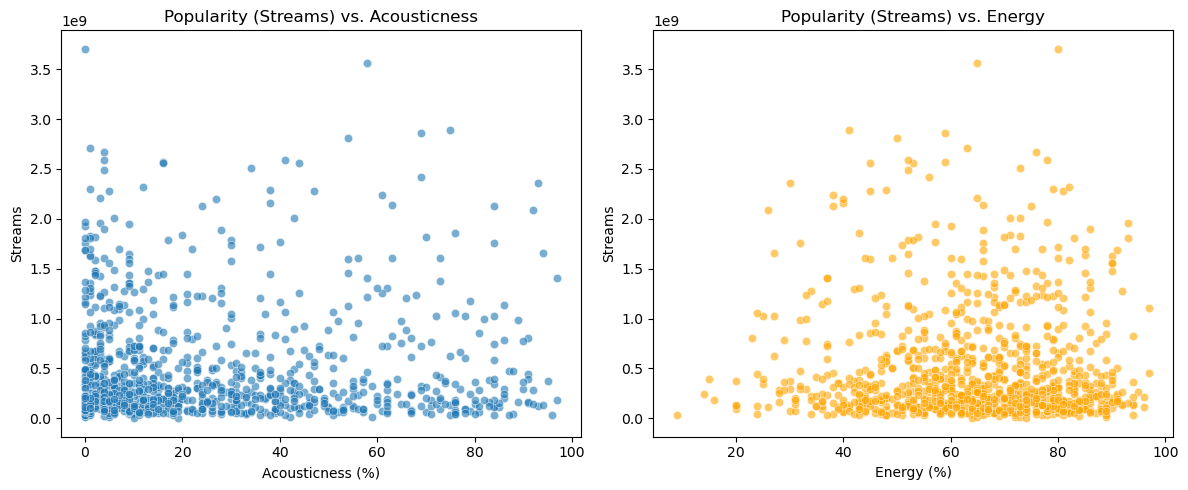

In [33]:
# Correlation between Streams and Acousticness vs Streams and Energy

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='acousticness_%', y='streams', alpha=0.6)
plt.title('Popularity (Streams) vs. Acousticness')
plt.xlabel('Acousticness (%)')
plt.ylabel('Streams')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='energy_%', y='streams', alpha=0.6, color='orange')
plt.title('Popularity (Streams) vs. Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')

plt.tight_layout()
plt.show()


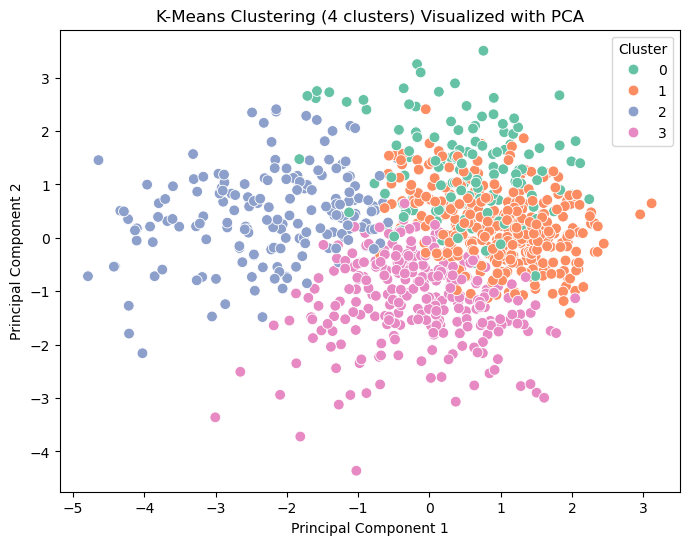

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = ['bpm', 'danceability_%', 'energy_%', 'valence_%',
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Separated into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=60)
plt.title('K-Means Clustering (4 clusters) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Songs grouped into distinct clusters based on energy, valence, danceability. The different clusters represent distinct song groups like high energy pop and low 

Clusters will represent distinct song groups (like High Energy Pop, Low Energy Acoustic).
You can label clusters later (e.g., High Energy Pop, Low Energy Acoustic, etc.).
Mention in report: “Using PCA, songs grouped into distinct clusters based on energy, valence, and danceability, suggesting coherent musical similarity patterns.”